In [1]:
%load_ext autoreload

%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import glob
import os
import sys

from tqdm.notebook import tqdm
from datetime import datetime

In [127]:
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer, RobustScaler, MinMaxScaler, StandardScaler, LabelBinarizer
from sklearn.preprocessing import normalize, robust_scale, minmax_scale

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.kernel_approximation import RBFSampler, Nystroem

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, GroupKFold, KFold

from sklearn.impute import SimpleImputer

from sklearn.metrics import make_scorer, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix, f1_score, recall_score, accuracy_score
from sklearn.multiclass import OneVsRestClassifier

from mlxtend.evaluate import scoring

In [63]:
data = pd.read_pickle(os.getcwd() + "/mongosmall_dataset.pickle").set_index(["Radiant_win", "match_id"])

In [86]:
data.iloc[:,20:45]

p1        p2        p3        p4        p5  \
Radiant_win match_id                                                       
f           2043302053  0.509563       NaN  0.576787  0.570254  0.539472   
            2304549882  0.443663  0.487923  0.474747   0.50564  0.546471   
            2042651607  0.469576  0.456825   0.64761  0.577423  0.483953   
            2042142434  0.597695  0.399971  0.440771  0.532916  0.452192   
            2304882719   0.49238  0.433374  0.550361  0.485542       NaN   
...                          ...       ...       ...       ...       ...   
t           2305975527  0.603705  0.502268  0.476608  0.440817  0.511771   
            2306472512       NaN  0.542487  0.499525       NaN       NaN   
            2304685845  0.482441  0.599737  0.536635  0.508859       NaN   
            2305444968  0.459644  0.472245  0.443542  0.518472  0.482161   
            2306304836       NaN  0.584325  0.490353       NaN       NaN   

                              p6        p7        p8        p9       p10  ...  \
Radiant_win match_id                                                      ...   
f           2043302053  0.539788       NaN  0.523982  0.439246  0.505243  ...   
            2304549882  0.371623       NaN  0.587496  0.437301       NaN  ...   
            2042651607  0.468136  0.544209  0.611435  0.580072  0.544934  ...   
            2042142434  0.503927   0.48487  0.446991  0.560964  0.557539  ...   
            2304882719  0.509843  0.488309   0.54356  0.521375       NaN  ...   
...                          ...       ...       ...       ...       ...  ...   
t           2305975527  0.460667   0.50983  0.477228  0.565684  0.497022  ...   
            2306472512  0.414798  0.471377  0.563512  0.486718  0.565013  ...   
            2304685845  0.562016  0.536082  0.575491   0.51084       NaN  ...   
            2305444968  0.504934  0.498103  0.539224  0.513488  0.519596  ...   
            2306304836  0.552788  0.570736  0.552172  0.480773  0.578663  ...   

                             p16       p17       p18       p19       p20  \
Radiant_win match_id                                                       
f           2043302053  0.518826       NaN  0.531159  0.584133  0.508021   
            2304549882  0.451174  0.500172  0.593398  0.509022  0.489887   
            2042651607  0.575544  0.451372  0.579927  0.485369  0.421449   
            2042142434  0.531365   0.58336  0.421719  0.490645   0.51514   
            2304882719  0.555227  0.439413  0.470085  0.556526       NaN   
...                          ...       ...       ...       ...       ...   
t           2305975527  0.526898  0.449635  0.565444  0.402943  0.517495   
            2306472512  0.422868  0.458372  0.594728  0.506565   0.51686   
            2304685845  0.491635  0.557964  0.577397  0.433315       NaN   
            2305444968  0.454432   0.51811   0.45216  0.584895   0.47746   
            2306304836  0.478094  0.578512  0.554239  0.537995  0.511687   

                             p21       p22       p23       p24       p25  
Radiant_win match_id                                                      
f           2043302053  0.565928       NaN  0.535916  0.478303  0.553086  
            2304549882  0.382232  0.443825  0.518749  0.541791  0.488513  
            2042651607  0.503268  0.477044  0.594061  0.559375  0.446084  
            2042142434  0.577645  0.501191  0.432078  0.638257  0.504673  
            2304882719  0.632393  0.442412  0.469631  0.546466       NaN  
...                          ...       ...       ...       ...       ...  
t           2305975527  0.552923  0.452348  0.533496  0.487298  0.528198  
            2306472512   0.35508  0.613466   0.51555   0.54968  0.498094  
            2304685845   0.56883  0.509318   0.53542  0.474304       NaN  
            2305444968  0.603483  0.474428  0.477592       NaN  0.532878  
            2306304836  0.488979  0.546749  0.529728  0.456757  0.526939  

[7443 rows x 25 column

In [131]:
list(enumerate(data.columns))

[(0, 't1-p1'),
 (1, 't1-p2'),
 (2, 't1-p3'),
 (3, 't1-p4'),
 (4, 't1-p5'),
 (5, 't1-p6'),
 (6, 't1-p7'),
 (7, 't1-p8'),
 (8, 't1-p9'),
 (9, 't1-p10'),
 (10, 't2-p1'),
 (11, 't2-p2'),
 (12, 't2-p3'),
 (13, 't2-p4'),
 (14, 't2-p5'),
 (15, 't2-p6'),
 (16, 't2-p7'),
 (17, 't2-p8'),
 (18, 't2-p9'),
 (19, 't2-p10'),
 (20, 'p1'),
 (21, 'p2'),
 (22, 'p3'),
 (23, 'p4'),
 (24, 'p5'),
 (25, 'p6'),
 (26, 'p7'),
 (27, 'p8'),
 (28, 'p9'),
 (29, 'p10'),
 (30, 'p11'),
 (31, 'p12'),
 (32, 'p13'),
 (33, 'p14'),
 (34, 'p15'),
 (35, 'p16'),
 (36, 'p17'),
 (37, 'p18'),
 (38, 'p19'),
 (39, 'p20'),
 (40, 'p21'),
 (41, 'p22'),
 (42, 'p23'),
 (43, 'p24'),
 (44, 'p25'),
 (45, 'H1'),
 (46, 'H2'),
 (47, 'H3'),
 (48, 'H4'),
 (49, 'H5'),
 (50, 'H6'),
 (51, 'H7'),
 (52, 'H8'),
 (53, 'H9'),
 (54, 'H10'),
 (55, 'H11'),
 (56, 'H12'),
 (57, 'H13'),
 (58, 'H14'),
 (59, 'H15'),
 (60, 'H16'),
 (61, 'H17'),
 (62, 'H18'),
 (63, 'H19'),
 (64, 'H20'),
 (65, 'H21'),
 (66, 'H22'),
 (67, 'H23'),
 (68, 'H24'),
 (69, 'H25'),
 (70, 

In [56]:
X = data.copy()#.iloc[:,:50]
y = data.reset_index()["Radiant_win"].copy()

In [189]:
def FE_func(X):
    
    X = X.copy()
    
    outputdf = pd.DataFrame()
    
    outputdf["Adversity1"] = X.iloc[:,0:10].mean(axis = 1)
    outputdf["Adversity1S"] = X.iloc[:,0:10].std(axis = 1)
    outputdf["Adversity2"] = X.iloc[:,10:20].mean(axis = 1)
    outputdf["Adversity2S"] = X.iloc[:,0:10].std(axis = 1)
    
    return outputdf

In [190]:
pipe = Pipeline([
("FeatureEngineering", FunctionTransformer(FE_func)),
("Scaler",  RobustScaler()),
("PCA",     PCA()),
("LDA", LinearDiscriminantAnalysis())
])

cross_validate(pipe, X, y, scoring = "roc_auc")

{'fit_time': array([0.19238949, 0.11441207, 0.11559892, 0.11348104, 0.11282873]),
 'score_time': array([0.02968597, 0.0296793 , 0.0295465 , 0.02992582, 0.02977705]),
 'test_score': array([0.48772655, 0.51046384, 0.52435307, 0.53981185, 0.50793549])}

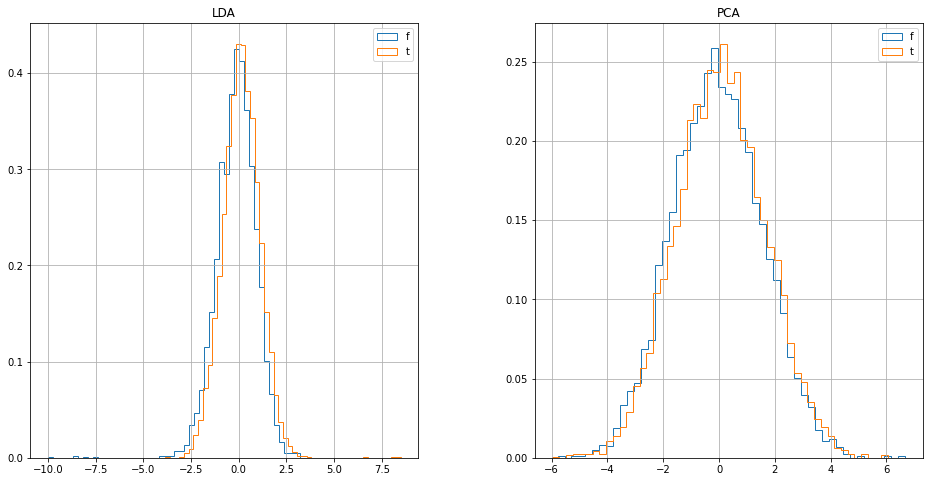

In [57]:
pipe = Pipeline([
("Imputer", SimpleImputer(missing_values = np.nan, strategy = "mean")),
("Scaler",  RobustScaler()),
("PCA",     PCA())
])

fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (16,8))

total_lda = pd.DataFrame(
    LinearDiscriminantAnalysis(n_components = 1).fit_transform(pipe.fit_transform(X), y)
    , index = data.index)


for name, df in total_lda.groupby(level = "Radiant_win"):

    df.hist(0, bins = 50, ax = ax1, histtype = 'step', label = name, density = True)

ax1.set_title("LDA")
ax1.legend()
    
total_pca = pd.DataFrame(
    PCA(n_components = 1).fit_transform(pipe.fit_transform(data), y)
    , index = data.index)


for name, df in total_pca.groupby(level = "Radiant_win"):

    df.hist(0, bins = 50, ax = ax2, histtype = 'step', label = name, density = True)

ax2.set_title("PCA")
plt.legend()